<p style="display: flex; align-items: center;">
    <img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" alt="Seaborn Logo" width="50" style="margin-right: 10px;">
    <span style="font-size: 32px; font-weight: bold;">📍 Heatmaps in Seaborn</span>
</p>

A **heatmap** is a visualization technique that uses color to represent values in a matrix. It is commonly used to show correlations between numerical variables, highlight missing data, or display tabular data in a visually intuitive way. Seaborn provides the `sns.heatmap()` function to create heatmaps easily.

## Creating a Basic Heatmap
We can start by creating a heatmap from a random dataset to understand its structure.

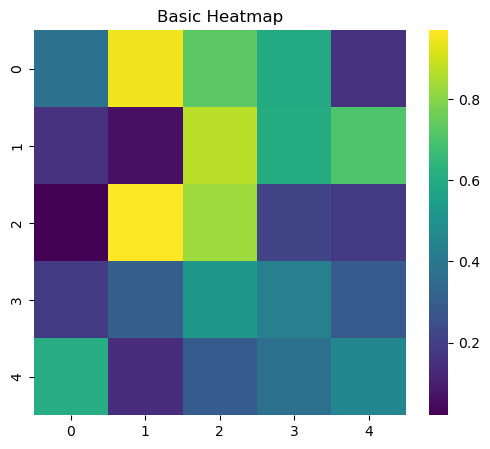

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generates a 5x5 matrix of random numbers
np.random.seed(42)
data = np.random.rand(5, 5)

# Sets the current figure size
plt.figure(figsize=(6, 5))

# See: https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    data,  # Uses the generated data
    cmap="viridis",  # Visualizes the matrix using colors from the specified colormap
)

# Adds a title
plt.title("Basic Heatmap")

# Shows the plot
plt.show()

`np.random.rand(5,5)` generates a 5x5 matrix of random values between 0 and 1. As we can see here,

In [25]:
data

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998]])

We plot this matrix of values in the heatmap above. What do we observe? Well, higher values appear in **brighter colors**, while lower values appear **darker**. Even though the data is random, this example helps us see how heatmaps assign colors to numerical values.

## Annotating Values in a Heatmap
In some cases, it’s helpful to see the actual numerical values inside each cell rather than just relying on color intensity. We can enable annotations using `annot=True`.

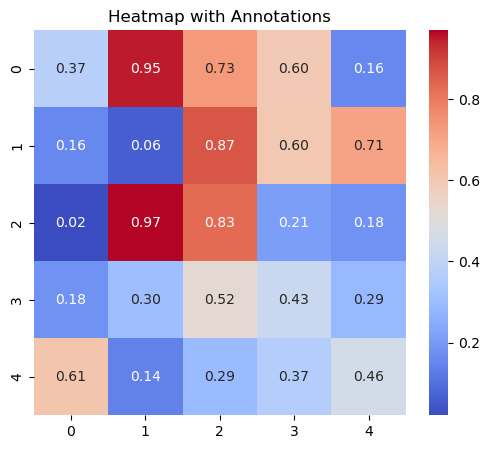

In [26]:
# Sets the current figure size
plt.figure(figsize=(6, 5))

# Creates a heatmap with annotations
sns.heatmap(
    data,  # Uses the generated data
    cmap="coolwarm",  # Visualizes the matrix using colors from the specified colormap
    annot=True,  # Enables annotations for each cell
    fmt=".2f",  # Ensures values are formatted to two decimal places
)

# Adds a title
plt.title("Heatmap with Annotations")

# Shows the plot
plt.show()

This makes the heatmap more **informative** when you need exact values, such as when working with financial data or performance metrics.

## Visualizing a Correlation Matrix
One of the most common uses of heatmaps is to visualize the **correlation** between numerical variables in a dataset. This helps understand **how strongly different features are related**.

We can compute the **correlation matrix** of any given Pandas data by using `pandas.DataFrame.corr()`. For example,

In [27]:
# Loads the tips dataset
tips = sns.load_dataset("tips")

# Computes the correlation matrix
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


The **correlation matrix** shows how strongly numerical variables relate to each other, ranging from **-1 to 1** where:

- **1** $\rightarrow$ Perfect positive correlation (both variables increase together).

- **0** $\rightarrow$ No correlation.

- **-1** $\rightarrow$ Perfect negative correlation (one variable increases while the other decreases).

The output of `pandas.DataFrame.corr()` is another Pandas DataFrame which is visually limited. Let's plot this DataFrame in a heatmap, using color to visually identify relationships between features.

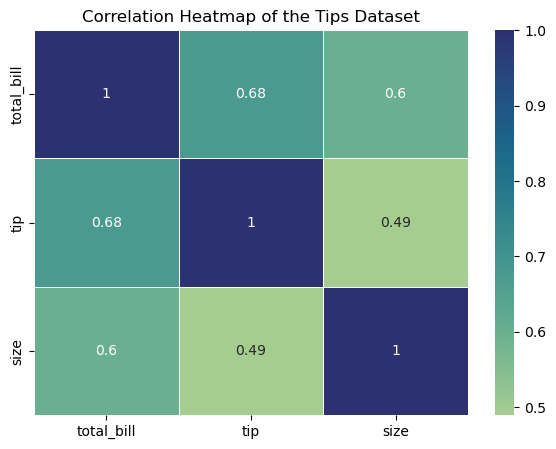

In [28]:
# Sets the current figure size
plt.figure(figsize=(7, 5))

# Creates a heatmap
sns.heatmap(
    corr,  # Uses the data from the computed correlation matrix
    cmap="crest",  # Visualizes the matrix using colors from the specified colormap 
    annot=True,  # Enables annotations for each cell 
    linewidths=0.5,  # Adjusts the line width between each cell
)

# Adds a title
plt.title("Correlation Heatmap of the Tips Dataset")

# Shows the plot
plt.show()

Now we can see that darker areas represent **stronger correlations**, while brighter colors indicate **weaker correlations**.

**Why is this useful?** Correlation heatmaps can help in feature selection (e.g., choosing the most relevant predictors in machine learning). They also help us identify relationships between variables (e.g., does total bill size affect tip amount?).

## Highlighting Missing Data
Sometimes, we need to check for **missing values** in a dataset before proceeding with analysis. A heatmap can visually highlight missing data, making it easier to decide how to handle it.

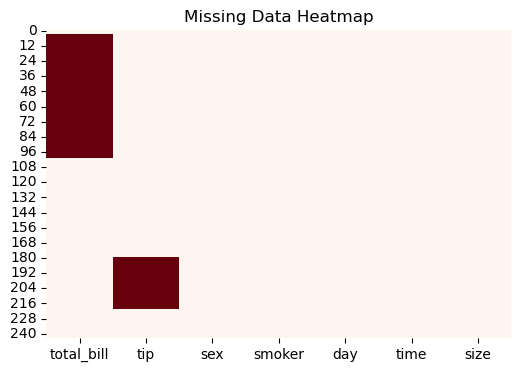

In [29]:
# Introduces some missing values
tips.loc[3:100, "total_bill"] = np.nan
tips.loc[180:220, "tip"] = np.nan

# Sets the current figure size
plt.figure(figsize=(6, 4))

# Creates a heatmap of missing values
sns.heatmap(
    tips.isnull(),  # Uses the tips data which now has some missing values
    cmap="Reds",  # Visualizes the matrix using colors from the specified colormap 
    cbar=False,  # Suppresses the color bar
)

# Adds a title
plt.title("Missing Data Heatmap")

# Shows the plot
plt.show()

**What does this heatmap show?** **Dark red cells** indicate missing values (NaN). **Lighter areas** represent valid data. The y-axis also indicates the **row indices**, so we can identify which rows have missing values or valid data for the specified column.

**Why is this useful?** With this missing data heatmap, we can quickly identify where data is missing instead of manually scanning tables. This also helps us decide whether to fill in, remove, or ignore missing data.

## 6.1 Quick Challenge
Use the `flights` dataset in Seaborn to create a heatmap that visualizes **passenger traffic** over different years and months. Format the heatmap to make it visually appealing.

**Hint:** Use `sns.load_dataset("flights")` and `sns.heatmap()` with `annot=True`.

In [ ]:
# Your code here
